# PREPROCCESSING DATA

### Import Data dan Library

In [89]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder





df = pd.read_excel('dataKasus-1.xlsx')
encoder = LabelEncoder()
scaler = MinMaxScaler()

### Menampilkan data

In [90]:
display(df.head())

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE,Unnamed: 12
0,1,NAMA 1,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE,NaN
1,2,NAMA 2,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE,NaN
2,3,NAMA 3,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
3,4,NAMA 4,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN
4,5,NAMA 5,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE,NaN


## Cek Tipe Data

In [91]:
# Tipe data kolom tertentu
print(df.dtypes)

NO                                   int64
NAMA                                object
USIA                                object
PARITAS                              int64
JARAK KELAHIRAN                     object
RIW HIPERTENSI                      object
RIW PE                              object
OBESITAS                            object
RIW DM                              object
RIW HIPERTENSI/PE DALAM KELUARGA    object
SOSEK RENDAH                        object
PE/Non PE                           object
Unnamed: 12                         object
dtype: object


## Menghapus attribute yang tidak berkolerasi

In [92]:
# Menghapus kolom
df = df.drop(['NO', 'NAMA', 'Unnamed: 12'], axis=1)
display(df.head())

,USIA,PARITAS,JARAK KELAHIRAN,RIW HIPERTENSI,RIW PE,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,SOSEK RENDAH,PE/Non PE
0,23 TH,3,< 2 tahun,Tidak,Tidak,Tidak,Ya,Tidak,>UMR,Non PE
1,29 TH,2,< 2 tahun,Tidak,PEB,Tidak,Tidak,Ada,>UMR,PE
2,20 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE
3,18 TH,1,anak pertama,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE
4,34 TH,3,> 2 tahun,Tidak,Tidak,Tidak,Tidak,Tidak,>UMR,Non PE


### Menghitung total nilai NULL

In [93]:
print(df.isnull().sum())

USIA                                3
PARITAS                             0
JARAK KELAHIRAN                     7
RIW HIPERTENSI                      0
RIW PE                              0
OBESITAS                            0
RIW DM                              0
RIW HIPERTENSI/PE DALAM KELUARGA    0
SOSEK RENDAH                        0
PE/Non PE                           0
dtype: int64


## Cek apakah data sudah sesuai

In [94]:
jarak_kelahiran_counts = df['JARAK KELAHIRAN'].value_counts()
print('Jarak Kelahiran : \n',jarak_kelahiran_counts, '\n\n\n')

riw_hipertensi_counts = df['RIW HIPERTENSI'].value_counts()
print ('Hipertensi : \n',riw_hipertensi_counts, '\n\n\n')

riw_pe_counts = df['RIW PE'].value_counts()
print ('Riw PE : \n',riw_pe_counts, '\n\n\n')

obesitas_counts = df['OBESITAS'].value_counts()
print ('Obesitas : \n',obesitas_counts, '\n\n\n')

sosek_rendah_counts = df['SOSEK RENDAH'].value_counts()
print ('Sosek Rendah : \n',sosek_rendah_counts, '\n\n\n')

riw_dm_counts = df['RIW DM'].value_counts()
print ('Riw Dm : \n', riw_dm_counts, '\n\n\n')

pe_keluarga_counts = df['RIW HIPERTENSI/PE DALAM KELUARGA'].value_counts()
print ('Riw Hipertensi/PE Dalam Keluarga : \n', pe_keluarga_counts, '\n\n\n')

df["PE/Non PE"] = df["PE/Non PE"].apply(lambda x: "PE" if x != "Non PE" else x)
pe_non_pe_counts = df['PE/Non PE'].value_counts()
print ('PE/Non PE : \n', pe_non_pe_counts, '\n\n\n')

df = df.drop(columns=["SOSEK RENDAH"])

Jarak Kelahiran : 
 JARAK KELAHIRAN
anak pertama    260
> 2 tahun       211
< 2 tahun        81
> 2 tahun         2
Name: count, dtype: int64 



Hipertensi : 
 RIW HIPERTENSI
Tidak    508
Ya        53
Name: count, dtype: int64 



Riw PE : 
 RIW PE
Tidak                     526
PEB                        19
PE                          6
HELLP SYNDROM               2
Impending PE                2
Impending Eklamsia          1
Kejang Konvulsi             1
impending eklamsia          1
PE, HELLP Syndrome          1
PEB impending eklampsi      1
Impending Ekalmsia          1
Name: count, dtype: int64 



Obesitas : 
 OBESITAS
Tidak    556
Ya         5
Name: count, dtype: int64 



Sosek Rendah : 
 SOSEK RENDAH
>UMR    557
<UMR      4
Name: count, dtype: int64 



Riw Dm : 
 RIW DM
Tidak    556
Ya         5
Name: count, dtype: int64 



Riw Hipertensi/PE Dalam Keluarga : 
 RIW HIPERTENSI/PE DALAM KELUARGA
Tidak    550
Ada       11
Name: count, dtype: int64 



PE/Non PE : 
 PE/Non PE
Non 

## Membersihkan data di kolom 'USIA'

In [95]:
# Membersihkan kolom dan mengubah ke numerik
df['USIA'] = pd.to_numeric(df['USIA'].str.replace(r'\D', '', regex=True), errors='coerce')

# Mengisi nilai null dengan nilai rata-rata
df['USIA'] = df['USIA'].fillna(df['USIA'].mean()).astype(int)


## Membersihkan data 'JARAK KELAHIRAN'

In [96]:
# Menghapus baris yang memiliki nilai null pada kolom 'Status'
df = df.dropna(subset=['JARAK KELAHIRAN'])

In [97]:
# menghapus spasi
df['JARAK KELAHIRAN'] = df['JARAK KELAHIRAN'].str.strip()
jarak_kelahiran_counts = df['JARAK KELAHIRAN'].value_counts()
print(jarak_kelahiran_counts)

JARAK KELAHIRAN
anak pertama    260
> 2 tahun       213
< 2 tahun        81
Name: count, dtype: int64


In [98]:
## Membersihkan Data PE/Non PE

In [99]:
# menghapus spasi
df['PE/Non PE'] = df['PE/Non PE'].str.strip()
jarak_kelahiran_counts = df['PE/Non PE'].value_counts()
print(jarak_kelahiran_counts)

PE/Non PE
Non PE    514
PE         40
Name: count, dtype: int64


## Mengubah attribute kategorial Menjadi Numerik/Kategorikal

In [100]:
# mengubah 'RIW HIPERTENSI' menjadi numeric/kategorikal
df['RIW HIPERTENSI'] = df['RIW HIPERTENSI'].map({'Ya': 1, 'Tidak': 0})

# mengubah 'JARAK KELAHIRAN' menjadi numeric/kategorikal
df = pd.get_dummies(df, columns=['JARAK KELAHIRAN'])

# mengubah 'SOSEK RENDAH' menjadi numeric/kategorikal
# df = pd.get_dummies(df, columns=['SOSEK RENDAH'])

# mengubah 'RIW PE' menjadi numeric/kategorikal
df = pd.get_dummies(df, columns=['RIW PE'])

# mengubah 'OBESITAS' menjadi numeric/kategorikal
df['OBESITAS'] = df['OBESITAS'].map({'Tidak': 1, 'Ya': 0})

# mengubah 'RIW HIPERTENSI/PE DALAM KELUARGA' menjadi numeric/kategorikal
df['RIW HIPERTENSI/PE DALAM KELUARGA'] = df['RIW HIPERTENSI/PE DALAM KELUARGA'].map({'Tidak': 1, 'Ada': 0})

# mengubah 'RIW DM' menjadi numeric/kategorikal
df['RIW DM'] = df['RIW DM'].map({'Tidak': 1, 'Ya': 0})

# mengubah 'PE/Non PE' menjadi numeric/kategorikal
df['PE/Non PE'] = encoder.fit_transform(df['PE/Non PE'])

## Normalisasi attribute numerik

In [101]:
# menormalisasi Attribute USIA dan PARITAS
df[['USIA', 'PARITAS']] = scaler.fit_transform(df[['USIA', 'PARITAS']])

In [102]:
display(df.head())

,USIA,PARITAS,RIW HIPERTENSI,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,PE/Non PE,JARAK KELAHIRAN_< 2 tahun,JARAK KELAHIRAN_> 2 tahun,JARAK KELAHIRAN_anak pertama,...,RIW PE_Impending Ekalmsia,RIW PE_Impending Eklamsia,RIW PE_Impending PE,RIW PE_Kejang Konvulsi,RIW PE_PE,"RIW PE_PE, HELLP Syndrome",RIW PE_PEB,RIW PE_PEB impending eklampsi,RIW PE_Tidak,RIW PE_impending eklamsia
0,0.333333,0.500000,0,1,0,1,0,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.533333,0.333333,0,1,1,0,1,True,False,False,...,False,False,False,False,False,False,True,False,False,False
2,0.233333,0.166667,0,1,1,1,0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
3,0.166667,0.166667,0,1,1,1,0,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0.700000,0.500000,0,1,1,1,0,False,True,False,...,False,False,False,False,False,False,False,False,True,False


## Split Data

In [103]:

X = df.drop(columns=["PE/Non PE"])  # Atribut
y = df["PE/Non PE"]                 # Label
display(X.head())
display(y.head())

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,USIA,PARITAS,RIW HIPERTENSI,OBESITAS,RIW DM,RIW HIPERTENSI/PE DALAM KELUARGA,JARAK KELAHIRAN_< 2 tahun,JARAK KELAHIRAN_> 2 tahun,JARAK KELAHIRAN_anak pertama,RIW PE_HELLP SYNDROM,RIW PE_Impending Ekalmsia,RIW PE_Impending Eklamsia,RIW PE_Impending PE,RIW PE_Kejang Konvulsi,RIW PE_PE,"RIW PE_PE, HELLP Syndrome",RIW PE_PEB,RIW PE_PEB impending eklampsi,RIW PE_Tidak,RIW PE_impending eklamsia
0,0.333333,0.500000,0,1,0,1,True,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0.533333,0.333333,0,1,1,0,True,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0.233333,0.166667,0,1,1,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False
3,0.166667,0.166667,0,1,1,1,False,False,True,False,False,False,False,False,False,False,False,False,True,False
4,0.700000,0.500000,0,1,1,1,False,True,False,False,False,False,False,False,False,False,False,False,True,False


0    0
1    1
2    0
3    0
4    0
Name: PE/Non PE, dtype: int32

## Latih Model

Akurasi: 0.9279279279279279

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       102
           1       0.56      0.56      0.56         9

    accuracy                           0.93       111
   macro avg       0.76      0.76      0.76       111
weighted avg       0.93      0.93      0.93       111


Confusion Matrix:
 [[98  4]
 [ 4  5]]


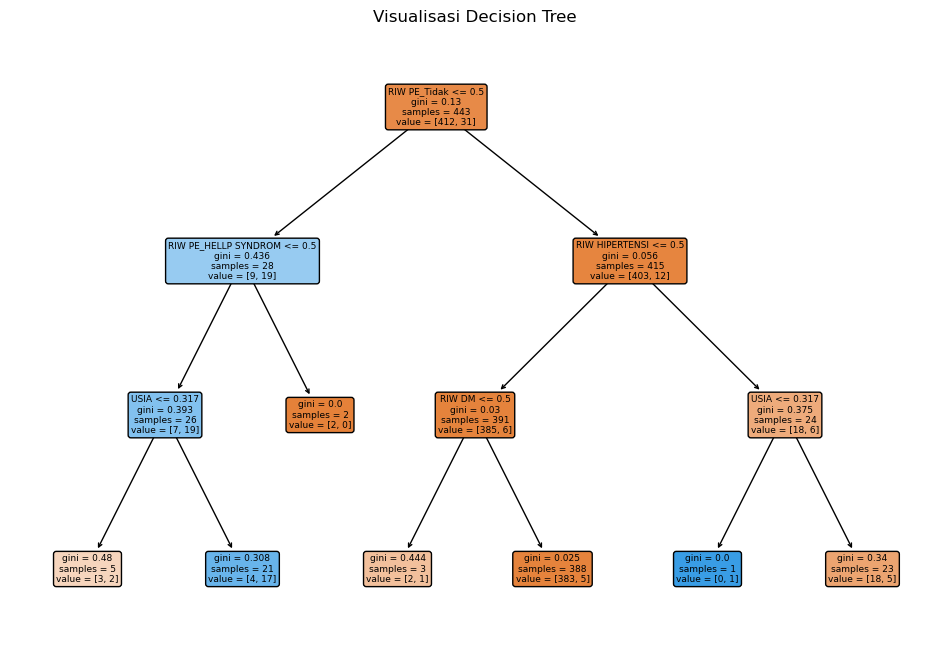


Rules of Decision Tree:
 |--- RIW PE_Tidak <= 0.50
|   |--- RIW PE_HELLP SYNDROM <= 0.50
|   |   |--- USIA <= 0.32
|   |   |   |--- class: 0
|   |   |--- USIA >  0.32
|   |   |   |--- class: 1
|   |--- RIW PE_HELLP SYNDROM >  0.50
|   |   |--- class: 0
|--- RIW PE_Tidak >  0.50
|   |--- RIW HIPERTENSI <= 0.50
|   |   |--- RIW DM <= 0.50
|   |   |   |--- class: 0
|   |   |--- RIW DM >  0.50
|   |   |   |--- class: 0
|   |--- RIW HIPERTENSI >  0.50
|   |   |--- USIA <= 0.32
|   |   |   |--- class: 1
|   |   |--- USIA >  0.32
|   |   |   |--- class: 0



In [104]:

# Inisialisasi model Decision Tree
dtree = DecisionTreeClassifier(random_state=42, max_depth=3)

# Melatih model
dtree.fit(X_train, y_train)

# Prediksi pada data test
y_pred = dtree.predict(X_test)

# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualisasi pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Visualisasi Decision Tree")
plt.show()

# Menampilkan pohon keputusan dalam bentuk teks
tree_rules = export_text(dtree, feature_names=list(X.columns))
print("\nRules of Decision Tree:\n", tree_rules)